Data Science.

* Hands-On
* Prediction the price of the house

In [ ]:
!pip -q install plotly --upgrade

     |████████████████████████████████| 15.2 MB 6.1 MB/s 


In [ ]:
!pip -q install yellowbrick

In [1]:
#Import python libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msn

**Import machine learning algorithms** 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error
from sklearn.model_selection import GridSearchCV

* Data Collection



In [3]:
#loading dataset
house_data=pd.read_csv('/content/Housing.csv')

In [4]:
#let us see the top 5 rows of the dataset
house_data.head(5)

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [5]:
#let us drop unnecessary data
house_data.drop(['Unnamed: 0'],axis= 1,inplace= True)

In [6]:
#let us see how many rows and columns
house_data.shape

(546, 12)

The dataset contains 546 rows and 12 columns.

**Exploratory Data Analysis**

In [7]:
#Check out the data types
house_data.dtypes

price       float64
lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway     object
recroom      object
fullbase     object
gashw        object
airco        object
garagepl      int64
prefarea     object
dtype: object

In [8]:
#Get information about the dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [9]:
#Check out missing data
house_data.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

* We use sweetviz to visualize the data


Sweetviz is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with just two lines of code. Output is a fully self-contained HTML application.

The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

In [10]:
! pip install Sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 7.1 MB/s 


In [11]:
#import sweetviz
import sweetviz as sv
import IPython

sweetviz_data= sv.analyze(house_data)

                                             |          | [  0%]   00:00 -> (? left)

In [12]:
sweetviz_data.show_html('analyze.html')

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



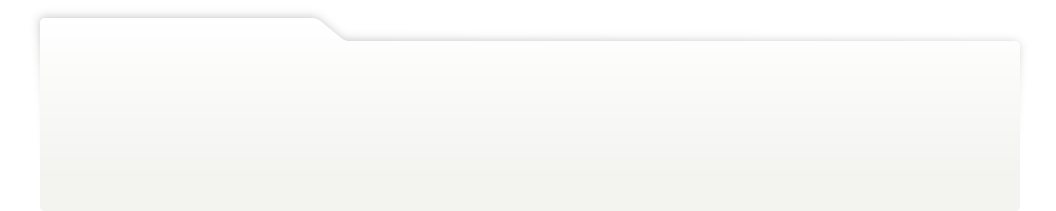
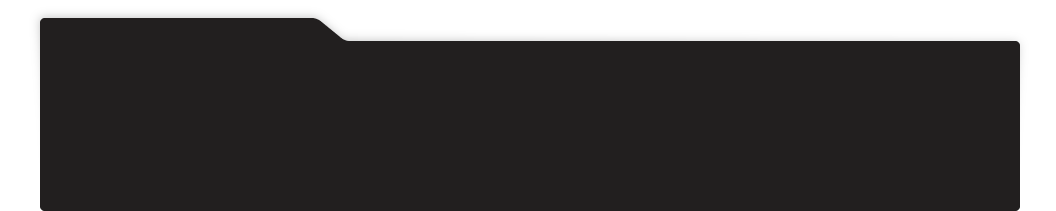
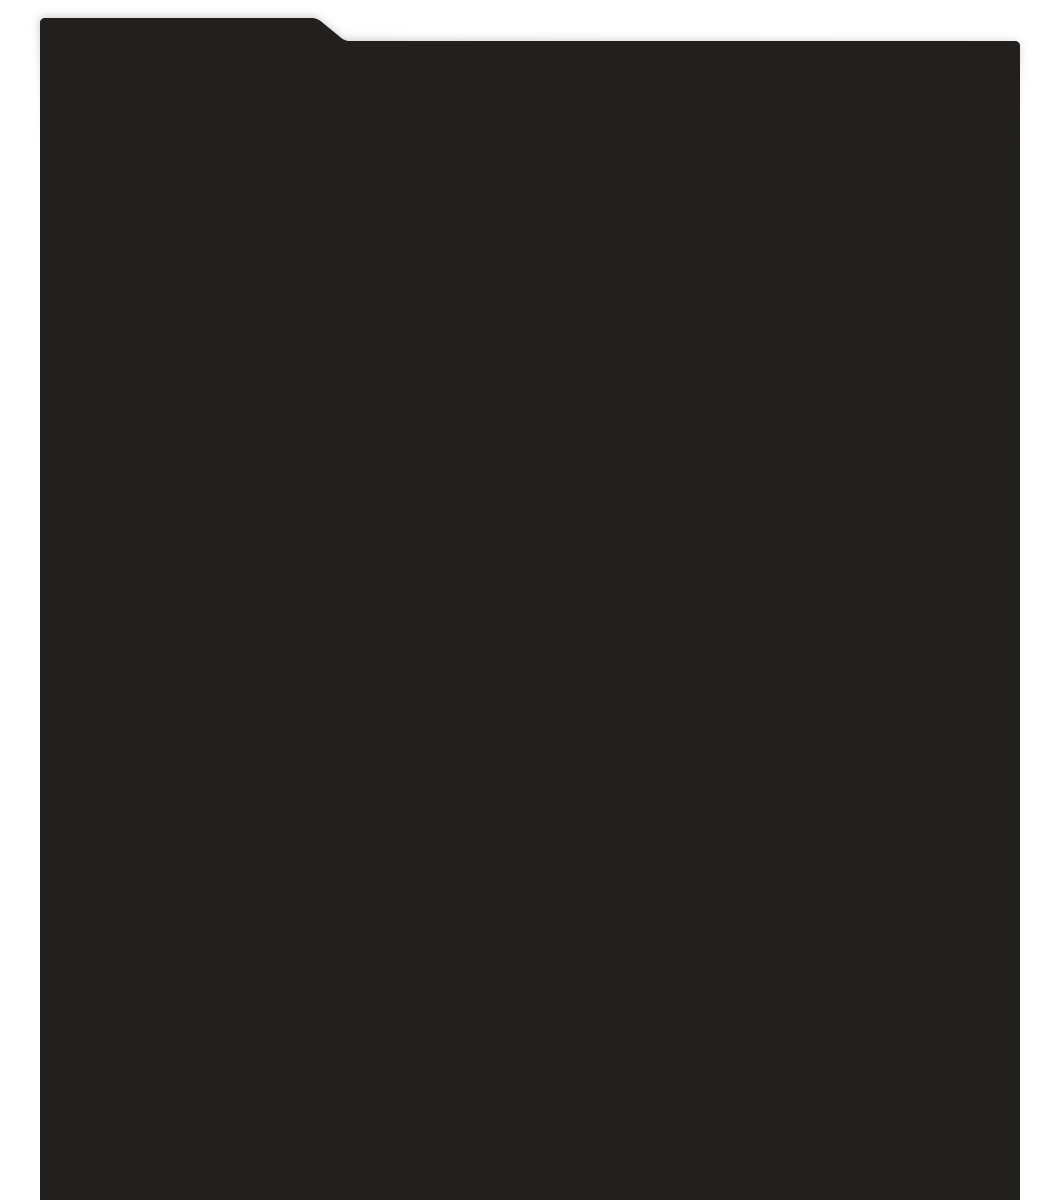
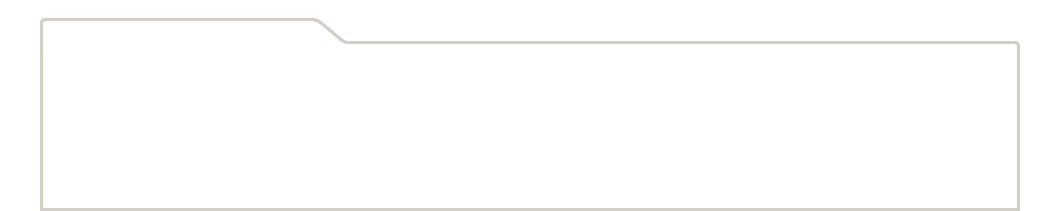
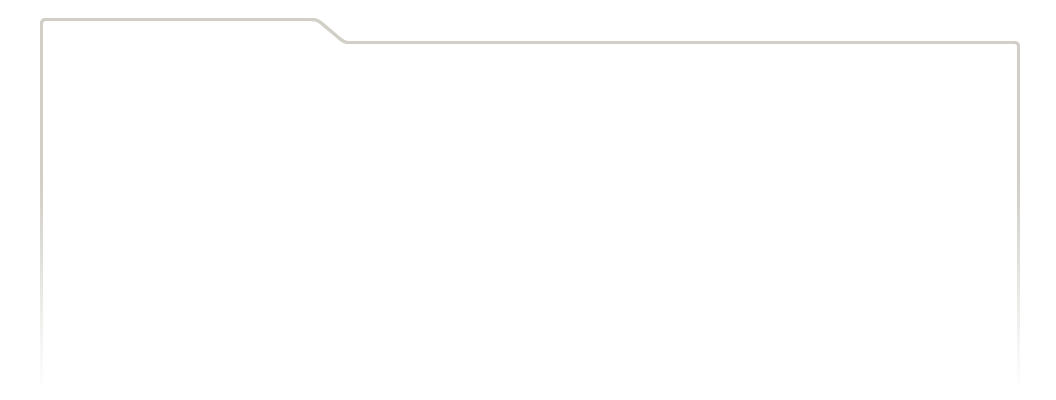
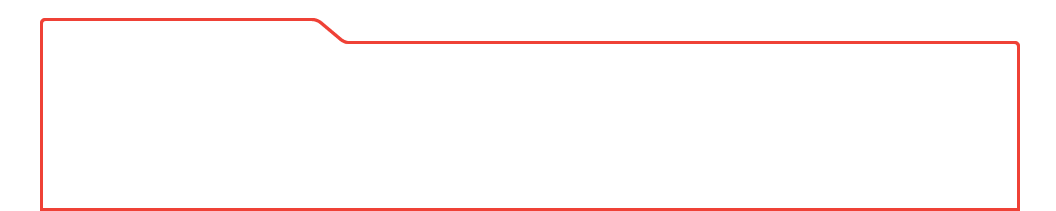
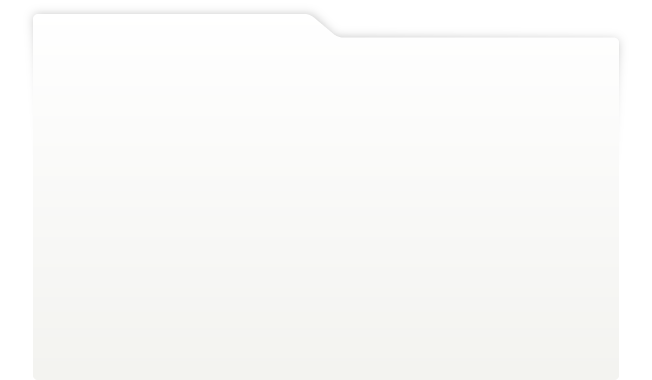
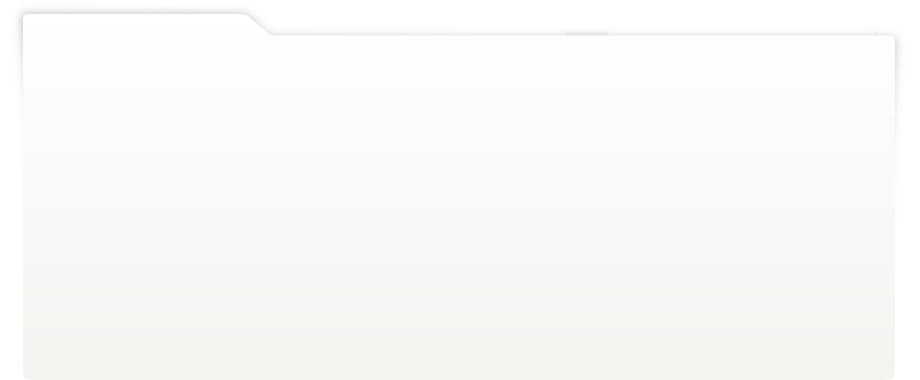
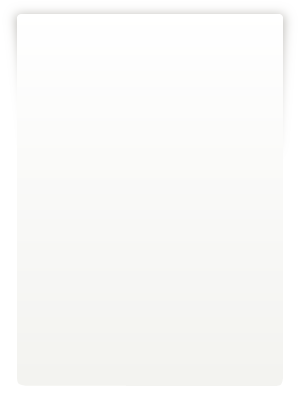
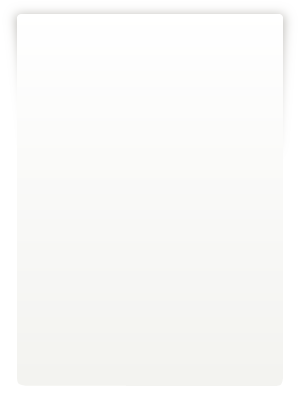
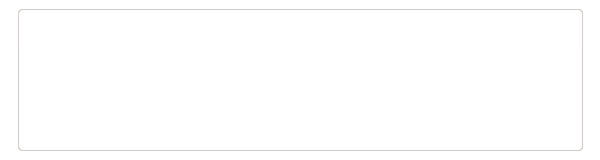
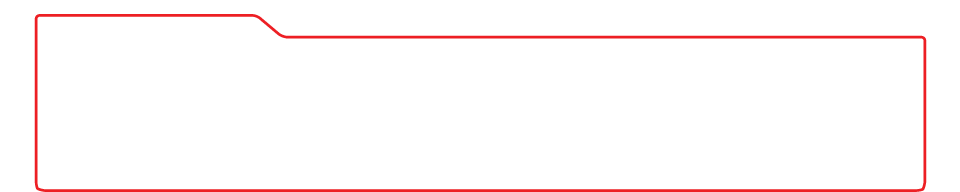
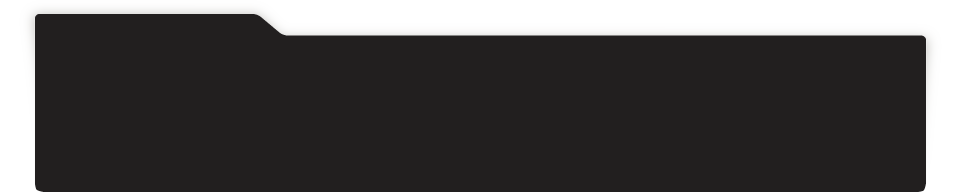
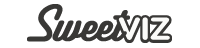
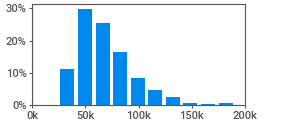
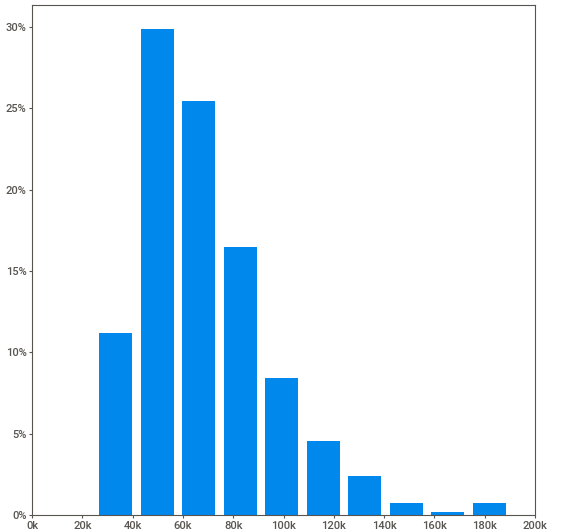
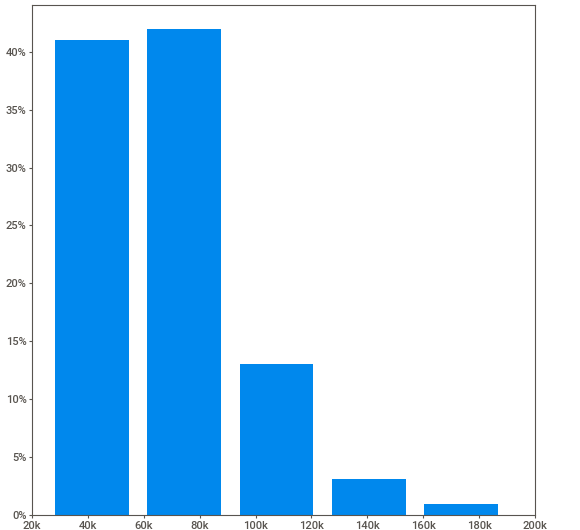
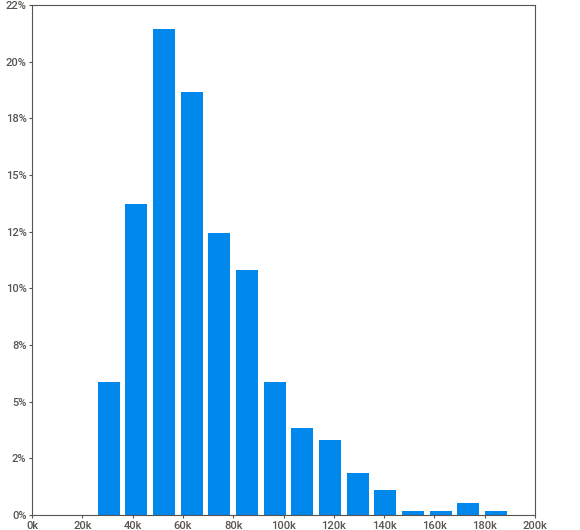
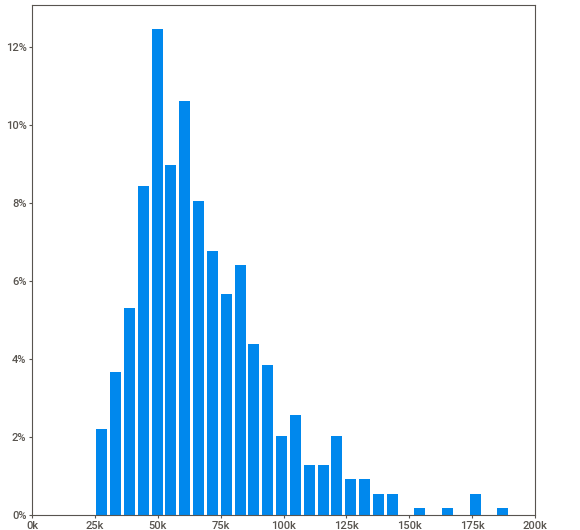
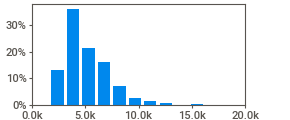
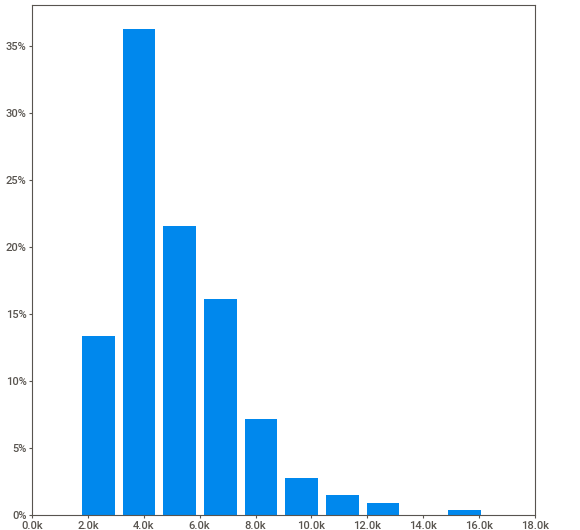
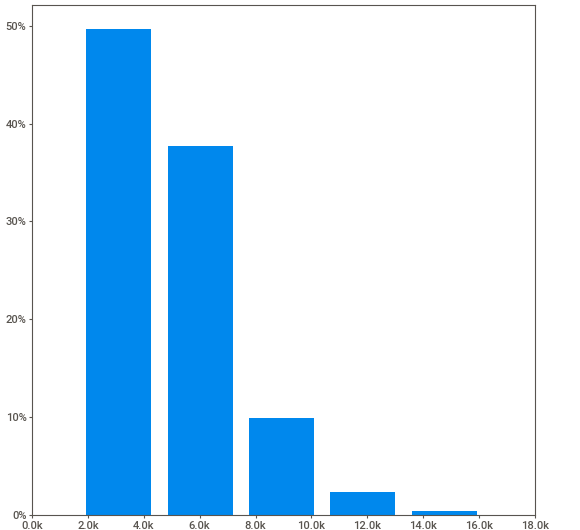
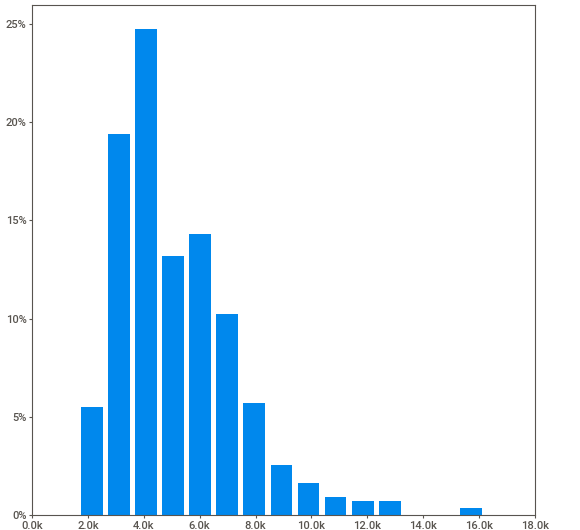
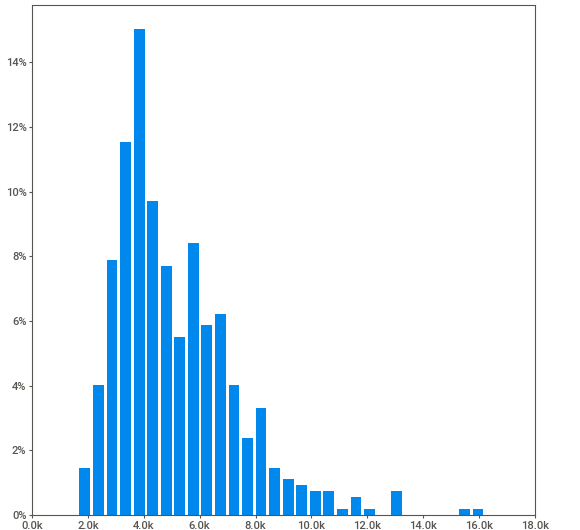
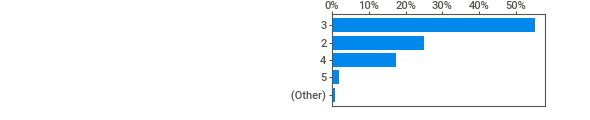
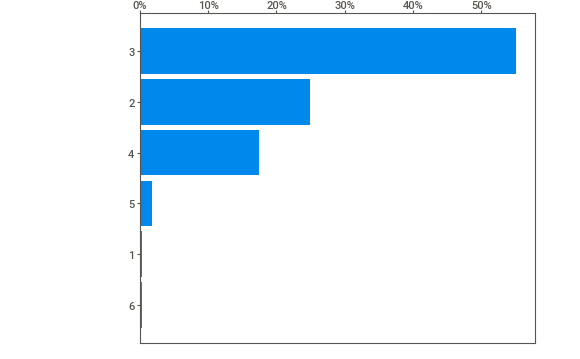
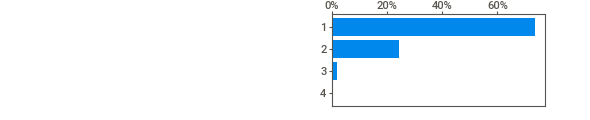
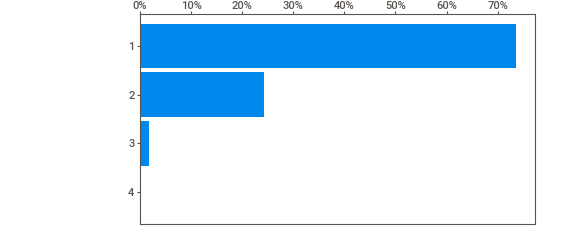
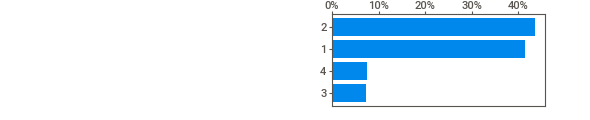
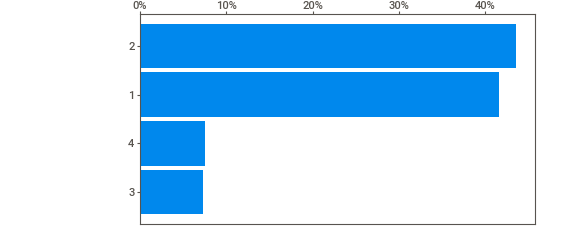
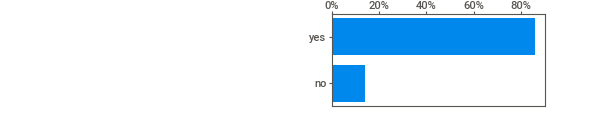
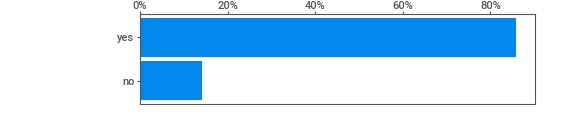
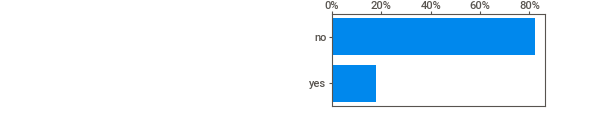
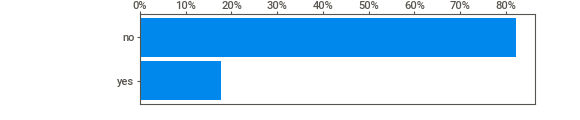
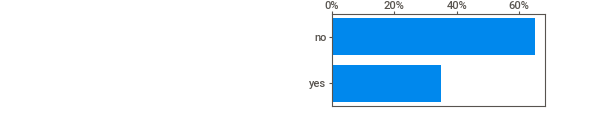
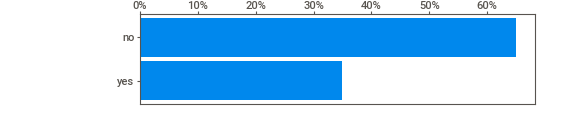
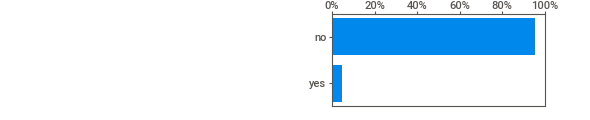
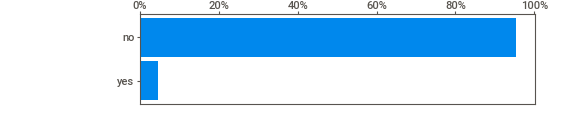
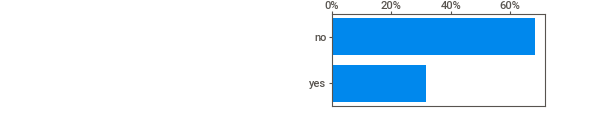
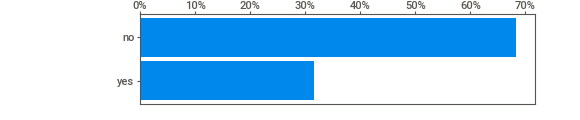
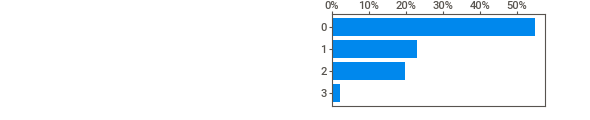
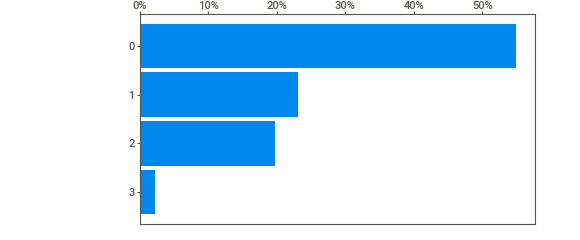
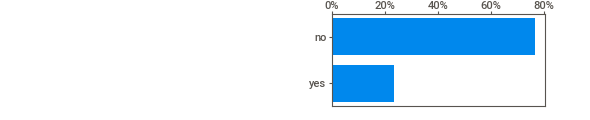
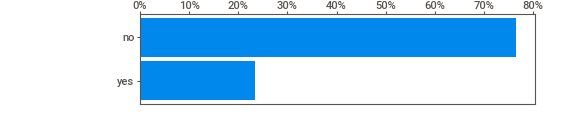
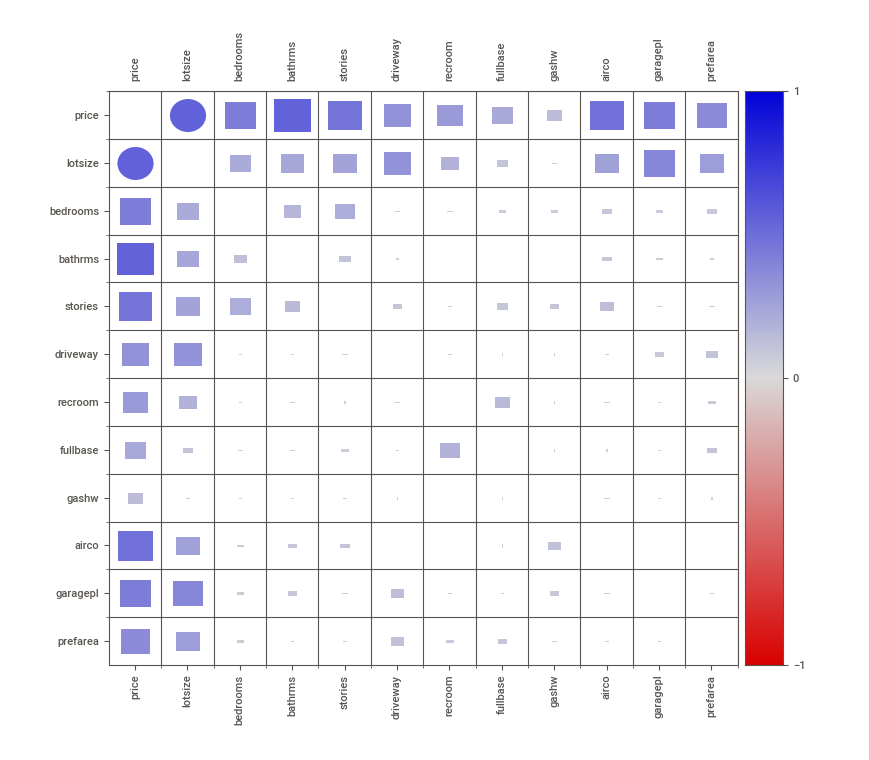
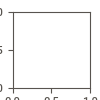

In [13]:
IPython.display.HTML('analyze.html')

In [14]:
#check out the correlation
correlation=house_data.corr()
correlation

,price,lotsize,bedrooms,bathrms,stories,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.324066,0.178178
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.043412
garagepl,0.383302,0.352872,0.139117,0.178178,0.043412,1.000000


The variables which have a strong correlation with the target_feature price are 
lotsize, bedrooms, stories,and bathrms .


In [15]:
#statistics
house_data.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


The mean of the house's price is 68121.59 dollars.

In [16]:
# Check out numbers of bedrooms by house
house_data['bedrooms'].value_counts(normalize=True)

3    0.551282
2    0.249084
4    0.173993
5    0.018315
1    0.003663
6    0.003663
Name: bedrooms, dtype: float64

In [17]:
# the mean of house's price by bedrooms
house_data[['price','bedrooms']].groupby(['price']).mean()

,bedrooms
price,
25000.0,2.666667
25245.0,3.000000
26000.0,2.000000
26500.0,2.000000
27000.0,2.500000
...,...
155000.0,3.000000
163000.0,4.000000
174500.0,4.000000


The mean of house's price by the number of bedrooms that house contains, here we can see it.

In [18]:
#Check out all characteristics of the house that has the higher price
house_data[house_data["price"]==190000.000000]

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
377,190000.0,7420,4,2,3,yes,no,no,no,yes,2,yes


In [19]:
house_data[house_data['price']==25000.000000]

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
55,25000.0,3620,2,1,1,yes,no,no,no,no,0,no
162,25000.0,2910,3,1,1,no,no,no,no,no,0,no
232,25000.0,3850,3,1,2,yes,no,no,no,no,0,no


There are three houses that have the same minimum price,25 000 dollars.

In [20]:
house_data[['garagepl','price']].groupby(['garagepl']).mean()

,price
garagepl,
0,59162.333333
1,74148.412698
2,84233.259259
3,83816.666667


The mean of house's price by the number of garagepl that house contains, here we can see it


Data visualisation:

Data visualization is the practice of translating information into a visual context, such as a map or graph, to make data easier for the human brain to understand and pull insights from. The main goal of data visualization is to make it easier to identify patterns, trends and outliers in large data sets

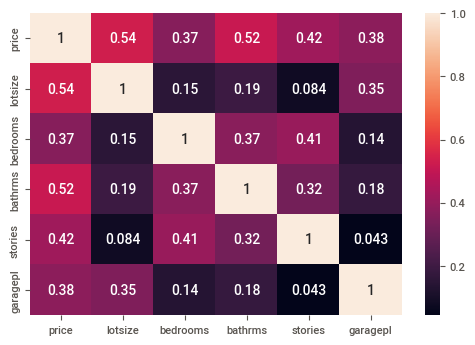

In [21]:
#check out the correation with seaborn heatmap graphic
f,ax=plt.figsize=(8,9)
sns.heatmap(correlation,annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


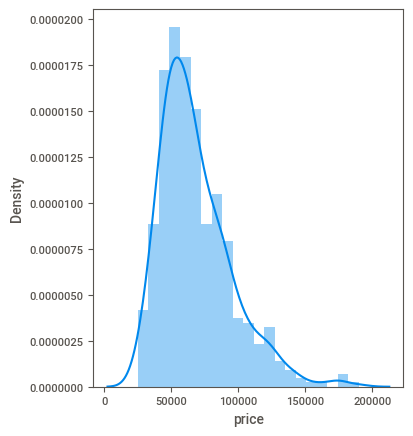

In [22]:
#let's see how target's distribution looks like 
f,ax= plt.subplots(figsize=(4,5))
sns.distplot(house_data.price);

In [23]:
#Seeing how the price distribution look likes
from scipy import stats
stats.skew(house_data.price)

1.206502970048597

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


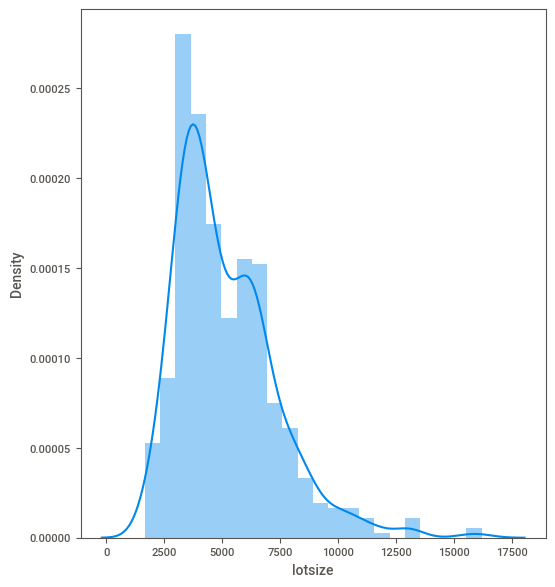

In [24]:
f,ax= plt.subplots(figsize=(6,7))
sns.distplot(house_data.lotsize);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

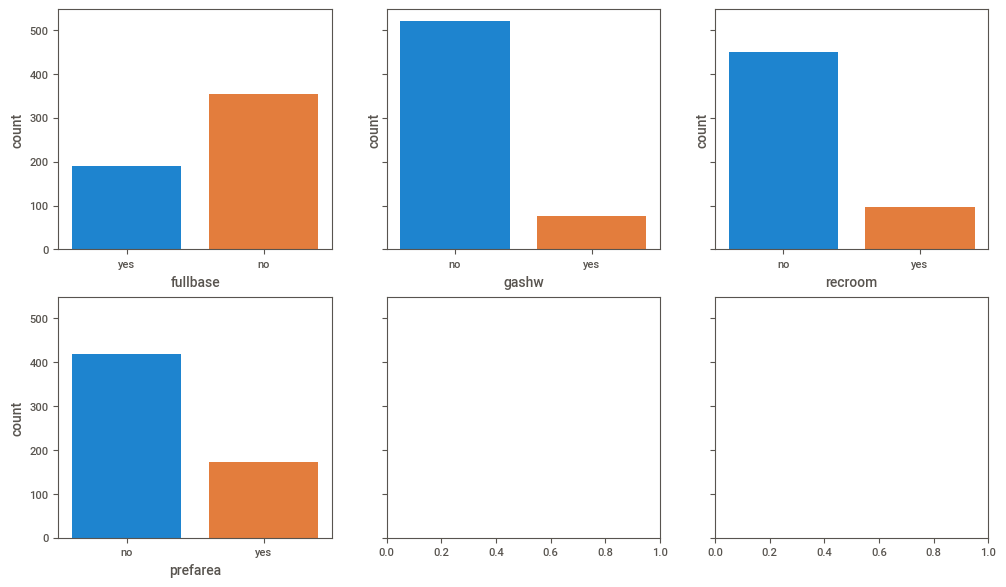

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("fullbase", data=house_data, ax=axes[0,0])
sns.countplot("driveway", data=house_data, ax=axes[0,1])
sns.countplot("recroom", data=house_data, ax=axes[0,2])
sns.countplot("airco", data=house_data, ax=axes[1,0])
sns.countplot("prefarea",data=house_data, ax=axes[1,0])
sns.countplot("gashw",data=house_data, ax=axes[0,1])

* Data preprocessing 

let's transform categorical data into numerical data. 

In [26]:
# Let's transform categorical data into numerical data
house_data['fullbase']=house_data['fullbase'].map({'yes': 1, 'no': 0})
house_data['driveway']=house_data['driveway'].map({'yes': 1, 'no': 0})
house_data['recroom']=house_data['recroom'].map({'yes': 1, 'no': 0})
house_data['airco']=house_data['airco'].map({'yes': 1, 'no': 0})
house_data['prefarea']=house_data['prefarea'].map({'yes': 1, 'no': 0})
house_data['gashw']=house_data['gashw'].map({'yes': 1, 'no': 0})

Let's create the input feature x and the output y, appply feature scaling on the numerical data.

In [27]:
# Apply standardscaler
standard=StandardScaler()
house_data[["lotsize","bedrooms","stories","bathrms"]]=standard.fit_transform(house_data[["lotsize","bedrooms","stories","bathrms"]])

In [28]:
#the input feature x
x=house_data.drop(['price'],axis= 1)

In [29]:
#the output y
y=house_data['price']

In [30]:
#splitting the data into training set and the testing set
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [31]:
X_train.shape,X_test.shape

((382, 11), (164, 11))

Data transformation with held out data:

Just as it is important to test a predictor on data held-out from training, preprocessing (such as standardization, feature selection, etc.) and similar data transformations similarly should be learnt from a training set and applied to held-out data for prediction:

**Model Training using GridSearchCV**

RandomForestRegressor

In [32]:
#instantiate the random forest regressor
random_fr= RandomForestRegressor()
#let's create the paramgrid
param_grid = [
 {'n_estimators': [100, 50], 'max_features': [2, 4,]},
 {'random_state': [100,50], 'max_depth': [2, 4,]},
 ]

In [33]:
# Instantiate the GridsearchCV.
randomforest_cv = GridSearchCV(random_fr, param_grid, cv=5, scoring='r2')

In [34]:
randomforest_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4], 'n_estimators': [100, 50]},
                         {'max_depth': [2, 4], 'random_state': [100, 50]}],
             scoring='r2')

In [35]:
#check out the best score
randomforest_cv.best_score_

0.642475384840498

In [36]:
#Evaluation the random forest on the test set
randomforest_regre = randomforest_cv.score(X_test, Y_test)
print(randomforest_regre)

0.5626304548620094


In [37]:
# Making the prediction with the test set
ypred= randomforest_cv.predict(X_test)


Let's compare the house's normal price with predicted values by selected machine learning algorithms

In [38]:
# create a dataframe to compare the results of models
compare_results= pd.DataFrame()

In [39]:
compare_results['normal_price']= Y_test.values

In [40]:
compare_results['randomforest_predicted_values']= ypred 

In [41]:
compare_results.head(10)

,normal_price,randomforest_predicted_values
0,60000.0,68542.0
1,55500.0,60158.0
2,51900.0,62435.0
3,80750.0,89244.0
4,130000.0,73101.0
5,45000.0,47570.0
6,35000.0,53393.0
7,140000.0,97684.0
8,49500.0,61268.0
9,72000.0,78489.0


## Regression metrics MSE,MAE,RMSE

In [42]:
#calculate the MSE
mse= mean_squared_error(Y_test,ypred)
mse

364319294.0351261

In [43]:
# calculate mean absolute error
mae= mean_absolute_error(Y_test,ypred)
mae

13171.409089721254

In [44]:
# applying RMSE
rmse= (np.sqrt(mean_squared_error(Y_test,ypred)))
rmse

19087.14997151555

**Decision TreeRegressor** 

In [45]:
# Instantiate decision tree classifier 
decisiontree = DecisionTreeRegressor()

In [46]:
#Create the parameters
parameters= [
  {'max_depth':[2,4,6], 'min_samples_leaf':[0.14],
   'random_state':[100,150,200],
   'min_samples_split':[2,4,6]}
]

# Instantiate the GridsearchCV.
decision_grid= GridSearchCV(decisiontree, param_grid=parameters, cv=5, scoring='r2')

#Fitting The random forest on the training set
print(decision_grid.fit(X_train,Y_train))

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [2, 4, 6], 'min_samples_leaf': [0.14],
                          'min_samples_split': [2, 4, 6],
                          'random_state': [100, 150, 200]}],
             scoring='r2')


In [47]:
decision_grid.best_score_

0.431968483473535

In [48]:
#Evaluation the decision tree regressor on the test set
decisiontree_regre = decision_grid.score(X_test, Y_test)
print(decisiontree_regre)

0.28537382988838755


In [49]:
# Make the prediction 
ypred_decision_tree= decision_grid.predict(X_test)

In [49]:
mae_decision= mean_absolute_error(Y_test,ypred_decision_tree)
mae_decision

17112.134707685476

In [51]:
# applying RMSE
rmse_decision= (np.sqrt(mean_squared_error(Y_test,ypred_decision_tree)))
rmse_decision

24398.11502794399

In [50]:
compare_results['decision_tree_predicted_values']= ypred_decision_tree
compare_results.head(10)

,normal_price,randomforest_predicted_values,decision_tree_predicted_values
0,60000.0,68542.0,74590.769231
1,55500.0,60158.0,55128.089888
2,51900.0,62435.0,45534.772727
3,80750.0,89244.0,74590.769231
4,130000.0,73101.0,74590.769231
5,45000.0,47570.0,74590.769231
6,35000.0,53393.0,65391.176471
7,140000.0,97684.0,65391.176471
8,49500.0,61268.0,65391.176471
9,72000.0,78489.0,74590.769231


Conclusion: